##### РК ИУ5-65Б  Вариант 20

### Импорт библиотек

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set(style="ticks")
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC , LinearSVC
from sklearn.datasets.samples_generator import make_blobs
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('impeachment-polls.csv', sep = ';' )
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292,61,36,373,37,59,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290,62,29,360,36,59,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320,64,30,370,42,53,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331,75,21,371,49,46,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577,77,15,499,41,53,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


In [3]:
data.shape

(88, 24)

In [4]:
# Заполняем отсутствующие значения 
data['Dem Sample'] = data['Dem Sample'].replace(0,np.nan)
data['Dem Sample'] = data['Dem Sample'].fillna(data['Dem Sample'].mean())
data['Rep Sample'] = data['Rep Sample'].replace(0,np.nan)
data['Rep Sample'] = data['Rep Sample'].fillna(data['Rep Sample'].mean())

In [5]:
data.dtypes

Start          object
End            object
Pollster       object
Sponsor        object
SampleSize      int64
Pop            object
tracking      float64
Text           object
Category       object
Include?       object
Yes             int64
No              int64
Unsure          int64
Rep Sample      int64
Rep Yes       float64
Rep No        float64
Dem Sample      int64
Dem Yes         int64
Dem No          int64
Ind Sample      int64
Ind Yes         int64
Ind No          int64
URL            object
Notes         float64
dtype: object

In [6]:
data.isnull().sum()
# проверим есть ли пропущенные значения

Start          0
End            0
Pollster       0
Sponsor       41
SampleSize     0
Pop            0
tracking      88
Text           0
Category       0
Include?       0
Yes            0
No             0
Unsure         0
Rep Sample     0
Rep Yes        2
Rep No         2
Dem Sample     0
Dem Yes        0
Dem No         0
Ind Sample     0
Ind Yes        0
Ind No         0
URL            0
Notes         88
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Start       88 non-null     object 
 1   End         88 non-null     object 
 2   Pollster    88 non-null     object 
 3   Sponsor     47 non-null     object 
 4   SampleSize  88 non-null     int64  
 5   Pop         88 non-null     object 
 6   tracking    0 non-null      float64
 7   Text        88 non-null     object 
 8   Category    88 non-null     object 
 9   Include?    88 non-null     object 
 10  Yes         88 non-null     int64  
 11  No          88 non-null     int64  
 12  Unsure      88 non-null     int64  
 13  Rep Sample  88 non-null     int64  
 14  Rep Yes     86 non-null     float64
 15  Rep No      86 non-null     float64
 16  Dem Sample  88 non-null     int64  
 17  Dem Yes     88 non-null     int64  
 18  Dem No      88 non-null     int64  
 19  Ind Sample  88 non-null     int

In [8]:
data.head()

,Start,End,Pollster,Sponsor,SampleSize,Pop,tracking,Text,Category,Include?,...,Rep Yes,Rep No,Dem Sample,Dem Yes,Dem No,Ind Sample,Ind Yes,Ind No,URL,Notes
0,6/28/2019,7/1/2019,ABC News/Washington Post,NaN,1008,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,87.0,292,61,36,373,37,59,https://games-cdn.washingtonpost.com/notes/pro...,NaN
1,4/22/2019,4/25/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,10.0,87.0,290,62,29,360,36,59,https://games-cdn.washingtonpost.com/notes/pro...,NaN
2,1/21/2019,1/24/2019,ABC News/Washington Post,NaN,1001,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,7.0,90.0,320,64,30,370,42,53,langerresearch.com/wp-content/uploads/1204a2Tr...,NaN
3,8/26/2018,8/29/2018,ABC News/Washington Post,NaN,1003,a,NaN,"Based on what you know, do you think Congress ...",begin_proceedings,yes,...,15.0,82.0,331,75,21,371,49,46,https://www.langerresearch.com/wp-content/uplo...,NaN
4,6/8/2019,6/12/2019,Civiqs,NaN,1559,rv,NaN,Do you think the House of Representatives shou...,begin_inquiry,yes,...,5.0,93.0,577,77,15,499,41,53,https://civiqs.com/documents/Civiqs_DailyKos_m...,NaN


<AxesSubplot:>

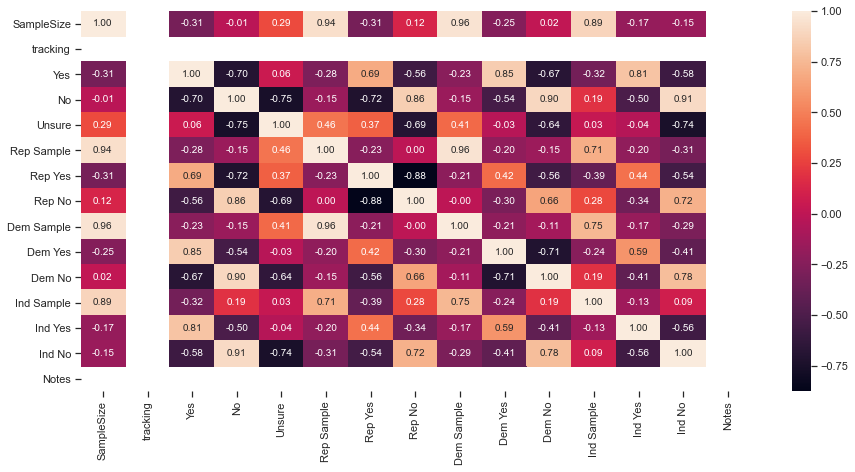

In [9]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [10]:
X = data[['SampleSize', 'Rep Sample']]
Y = data['Dem Sample']
print('Входные данные:\n\n', X.head(), '\n\nВыходные данные:\n\n', Y.head())

Входные данные:

    SampleSize  Rep Sample
0        1008         232
1        1001         260
2        1001         240
3        1003         251
4        1559         483 

Выходные данные:

 0    292
1    290
2    320
3    331
4    577
Name: Dem Sample, dtype: int64


In [11]:
X_train,  X_test,  Y_train,  Y_test = train_test_split(X,  Y, random_state = 0, test_size = 0.2)
print('Входные параметры обучающей выборки:\n\n',X_train.head(), \
      '\n\nВходные параметры тестовой выборки:\n\n', X_test.head(), \
      '\n\nВыходные параметры обучающей выборки:\n\n', Y_train.head(), \
      '\n\nВыходные параметры тестовой выборки:\n\n', Y_test.head())

Входные параметры обучающей выборки:

     SampleSize  Rep Sample
76         900         225
42        1002         321
22        1000         320
6         1007         262
61        1994         648 

Входные параметры тестовой выборки:

     SampleSize  Rep Sample
2         1001         240
13        1012         253
53         751         192
41        1004         321
66        1992         633 

Выходные параметры обучающей выборки:

 76    288
42    371
22    370
6     332
61    726
Name: Dem Sample, dtype: int64 

Выходные параметры тестовой выборки:

 2     320
13    304
53    240
41    371
66    792
Name: Dem Sample, dtype: int64


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,  median_absolute_error, r2_score 
from sklearn.svm import SVR

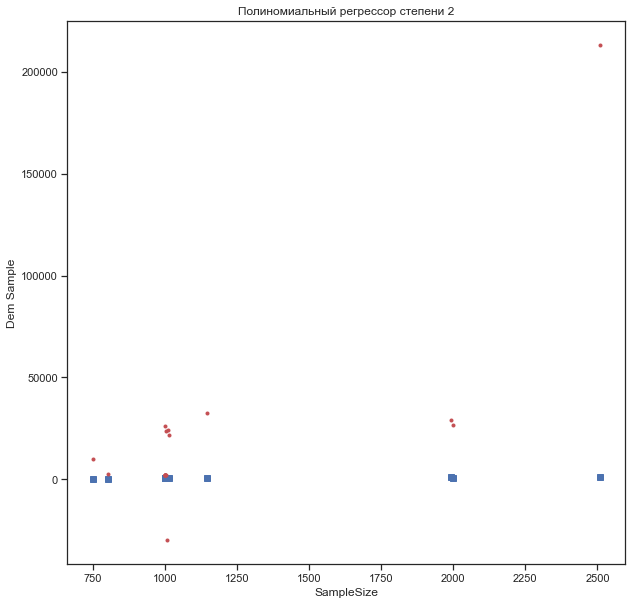

In [13]:
polySVR = SVR(kernel='poly', degree=2, gamma=0.3, C=1.0)
polySVR.fit(X_train, Y_train)
svr_y_pred = polySVR.predict(X_test)
fig, ax = plt.subplots(figsize=(10,10)) 
ax.set_title('Полиномиальный регрессор степени 2') 
ax.plot(X_test.SampleSize, Y_test, 'bs')
ax.plot(X_test.SampleSize, svr_y_pred, 'r.') 
ax.set_xlabel('SampleSize')
ax.set_ylabel('Dem Sample')
plt.show()

In [14]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, svr_y_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, svr_y_pred))
print('Median absolute error:',       median_absolute_error(Y_test, svr_y_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, svr_y_pred))

Средняя абсолютная ошибка: 24762.4691722124
Средняя квадратичная ошибка: 2818754710.1991086
Median absolute error: 15258.402271329898
Коэффициент детерминации: -84060.59528069508


In [15]:
from sklearn.ensemble import GradientBoostingRegressor

In [16]:
grad = GradientBoostingRegressor(n_estimators=5, random_state = 10)
grad.fit(X_train, Y_train)

GradientBoostingRegressor(n_estimators=5, random_state=10)

In [17]:
Y_grad_pred = grad.predict(X_test)

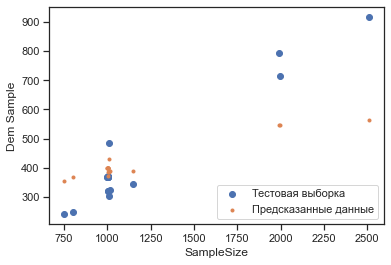

In [18]:
plt.scatter (X_test.SampleSize, Y_test,      marker = 'o', label = 'Тестовая выборка')
plt.scatter (X_test.SampleSize, Y_grad_pred, marker = '.', label = 'Предсказанные данные')
plt.legend (loc = 'lower right')
plt.xlabel ('SampleSize')
plt.ylabel ('Dem Sample')
plt.show ()

In [19]:
print('Средняя абсолютная ошибка:',   mean_absolute_error(Y_test, Y_grad_pred))
print('Средняя квадратичная ошибка:', mean_squared_error(Y_test, Y_grad_pred))
print('Median absolute error:',       median_absolute_error(Y_test, Y_grad_pred))
print('Коэффициент детерминации:',    r2_score(Y_test, Y_grad_pred))

Средняя абсолютная ошибка: 86.19455672841605
Средняя квадратичная ошибка: 14879.45514396514
Median absolute error: 53.99459110525322
Коэффициент детерминации: 0.5562612341600657


### Вывод: Модель обученная методом "Градиентный бустинг" обучилась лучше чем методом опорных векторов.